# Project: Investigate the Misuse of Healthcare Resources Through Missed Appointments

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

According to the <a href="https://data.worldbank.org/indicator/SH.XPD.PCAP?end=2014&start=1995&view=chart">World Bank analysis</a> of World Health Organization Global Health Expenditure data, annual health expenditure per capita significantly increased from 1995-2014. Within this 10 year period, expenditures increased from \$461 to \$1,058 per person. This 130% increase outpaces growth in international GDP per capita by 30% (1995: \$5,403, 2014: \$10,871, <a href="https://data.worldbank.org/indicator/NY.GDP.PCAP.CD?view=chart">World Bank Data</a>).

As healthcare expenditures increase, healthcare resources must be strategic utilized. In order to understand the use and misuse of healthcare resources, 100,000 medical appointments in Brazil will be analyzed. The purpose of the analysis is to understand what characterstics are commonly associated with a "no-show appointment," which is when an appointment is scheduled and the patient does not arrive for the appointment, and what hospitals do patients with these characteristics visit.

The dependent variable considered is whether or not the patient arrives for the appointment. The independent variables to be considered are age-group (0-18, 19-44, 45-64, 65-84, and 85 and over; these age bins reflect the same bins used by the <a href="https://www.cms.gov/Research-Statistics-Data-and-Systems/Statistics-Trends-and-Reports/NationalHealthExpendData/Age-and-Gender.html">Centers for Medicare and Medicaid Services "Health Expenditures by Age and Gender" study</a>),"Scholarship"(whether the patient receives federal assistance or does not receive federal assistance), and general well-being (whether the patient has hypertension, diabetes, alcoholism, or handicap or none of these conditions).

Once the initial analysis is complete, the above indpendent variables will then be grouped by neighborhood, the next dependent variable to be analyzed. Grouping by neighborhood will create profiles for each neighborhood based on age-groups, scholarship, and general well-being.

Combining the results from each analysis will provide initial conclusions for understanding which group(s) based on age, scholarship, and general well-being, misuse healthcare resources and in which neighborhoods these groups are concentrated.

All data provided by JoniHoppen from the <a href="https://www.kaggle.com/joniarroba/noshowappointments">"Medical Appointment No Shows" dataset</a>.

In [97]:
# Import statements for all of the packages used.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [98]:
# Load data
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
# Inspect data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [99]:
# Visually inspect data rows
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [100]:
# Inspect data count
df.count()

PatientId         110527
AppointmentID     110527
Gender            110527
ScheduledDay      110527
AppointmentDay    110527
Age               110527
Neighbourhood     110527
Scholarship       110527
Hipertension      110527
Diabetes          110527
Alcoholism        110527
Handcap           110527
SMS_received      110527
No-show           110527
dtype: int64

In [101]:
# Find duplicate rows
df[df.duplicated(keep=False)].count()[0]

0

The data inspection revealed a data frame with 14 columns (PatientId, AppointmentID, Gender, ScheduledDay, AppointmentDay, Age, Neighbourhood, Scholarship, Hipertension, Diabetes, Alcoholism, Handcap, SMS_received, No-show) and 110527 rows with no duplicates. Looking at the first 5 rows shows several of the columns to be binary values.

### Data Cleaning

The data cleaning of the dataframe will require the renaming of columns to correct spelling, the deletion of columns to focus on data for this study, and further examination of the remaining columns.

In [102]:
#Drop columns not to be used in this study
df = df.drop(['PatientId','Gender','ScheduledDay','AppointmentDay','SMS_received'], axis = 1);

In [103]:
# Inspect updated df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 9 columns):
AppointmentID    110527 non-null int64
Age              110527 non-null int64
Neighbourhood    110527 non-null object
Scholarship      110527 non-null int64
Hipertension     110527 non-null int64
Diabetes         110527 non-null int64
Alcoholism       110527 non-null int64
Handcap          110527 non-null int64
No-show          110527 non-null object
dtypes: int64(7), object(2)
memory usage: 7.6+ MB


In [104]:
# Inspect number of unique values in each column
df.nunique()

AppointmentID    110527
Age                 104
Neighbourhood        81
Scholarship           2
Hipertension          2
Diabetes              2
Alcoholism            2
Handcap               5
No-show               2
dtype: int64

In [105]:
# Correct mispelling, change regional spelling of column names, add '_' to 'appointmentid', remove hyphen from 'No-show', and make column name's lowercase.
df = df.rename(index=str, columns={'AppointmentID': 'appointment_id',"Neighbourhood": "neighborhood","Hipertension": "hypertension", "Handcap": "handicap", "No-show": "no_show"});
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 110527 entries, 0 to 110526
Data columns (total 9 columns):
appointment_id    110527 non-null int64
Age               110527 non-null int64
neighborhood      110527 non-null object
Scholarship       110527 non-null int64
hypertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
handicap          110527 non-null int64
no_show           110527 non-null object
dtypes: int64(7), object(2)
memory usage: 8.4+ MB


In [106]:
# For consistency, convert all remaining columns to lowercase
df.columns = map(str.lower, df.columns)

In [107]:
# For consistency, convert all values in the column 'neighboorhood' to lowercase
df['neighborhood'] = df['neighborhood'].str.lower()

In [108]:
df.head()

,appointment_id,age,neighborhood,scholarship,hypertension,diabetes,alcoholism,handicap,no_show
0,5642903,62,jardim da penha,0,1,0,0,0,No
1,5642503,56,jardim da penha,0,0,0,0,0,No
2,5642549,62,mata da praia,0,0,0,0,0,No
3,5642828,8,pontal de camburi,0,0,0,0,0,No
4,5642494,56,jardim da penha,0,1,1,0,0,No


In [109]:
# Further inspect each column
df['age'].max()

115

In [110]:
df['age'].min()

-1

In [111]:
# Identify which row contains an age of -1, because -1 is not a real age.
df[df['age']==-1]

,appointment_id,age,neighborhood,scholarship,hypertension,diabetes,alcoholism,handicap,no_show
99832,5775010,-1,romão,0,0,0,0,0,No


In [112]:
# Drop the row associated with 'age' = -1
drop_age = df[df['age']==-1].index[0]
df = df.drop([drop_age])

In [113]:
# Confirm drop of row associated with 'age' = -1
df['age'].min()

0

In [114]:
# Investigage list of 'neighborhood' values
sorted(df['neighborhood'].unique())

['aeroporto',
 'andorinhas',
 'antônio honório',
 'ariovaldo favalessa',
 'barro vermelho',
 'bela vista',
 'bento ferreira',
 'boa vista',
 'bonfim',
 'caratoíra',
 'centro',
 'comdusa',
 'conquista',
 'consolação',
 'cruzamento',
 'da penha',
 'de lourdes',
 'do cabral',
 'do moscoso',
 'do quadro',
 'enseada do suá',
 'estrelinha',
 'fonte grande',
 'forte são joão',
 'fradinhos',
 'goiabeiras',
 'grande vitória',
 'gurigica',
 'horto',
 'ilha das caieiras',
 'ilha de santa maria',
 'ilha do boi',
 'ilha do frade',
 'ilha do príncipe',
 'ilhas oceânicas de trindade',
 'inhanguetá',
 'itararé',
 'jabour',
 'jardim camburi',
 'jardim da penha',
 'jesus de nazareth',
 'joana d´arc',
 'jucutuquara',
 'maria ortiz',
 'maruípe',
 'mata da praia',
 'monte belo',
 'morada de camburi',
 'mário cypreste',
 'nazareth',
 'nova palestina',
 'parque industrial',
 'parque moscoso',
 'piedade',
 'pontal de camburi',
 'praia do canto',
 'praia do suá',
 'redenção',
 'república',
 'resistência',
 'ro

In [115]:
# Verify all columns 'scholarship', 'hypertension', 'diabetes', 'alcoholism', 'handicap', and 'no_show'
# only contain binary data
df['scholarship'].unique()

array([0, 1])

In [116]:
df['hypertension'].unique()

array([1, 0])

In [117]:
df['diabetes'].unique()

array([0, 1])

In [118]:
df['alcoholism'].unique()

array([0, 1])

In [119]:
df['handicap'].unique()

array([0, 1, 2, 3, 4])

In [120]:
df['no_show'].unique()

array(['No', 'Yes'], dtype=object)

Inspection of the 'handicap' column displays 5 values: 0,1,2,3,4. According to JoniHoppen, who provided the data, "the handcap refers to the number of desabilites a person has. For example, if the person is blind and can't walk the total is 2."

In [121]:
# Proportion of how many patients have each number of handicaps
zero_handicap = df[df['handicap']==0].count()[0]/(df.nunique()[0])
one_handicap = df[df['handicap']==1].count()[0]/(df.nunique()[0])
two_handicap = df[df['handicap']==2].count()[0]/(df.nunique()[0])
three_handicap = df[df['handicap']==3].count()[0]/(df.nunique()[0])
four_handicap = df[df['handicap']==4].count()[0]/(df.nunique()[0])
print(zero_handicap, one_handicap, two_handicap, three_handicap, four_handicap)

0.979724227784 0.0184752908818 0.00165571901634 0.000117619383674 2.71429346941e-05


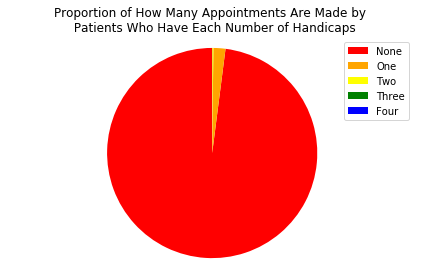

In [122]:
# Pie chart of proportion of how many patients have each number of handicaps
labels = ['None', 'One', 'Two', 'Three', 'Four']
sizes = [zero_handicap, one_handicap, two_handicap, three_handicap, four_handicap]
colors = ['red', 'orange', 'yellow', 'green', 'blue']
patches, texts = plt.pie(sizes, colors=colors, startangle=90)
plt.legend(patches, labels, loc="best")
plt.title('Proportion of How Many Appointments Are Made by \n Patients Who Have Each Number of Handicaps')
# Set aspect ratio to be equal so that pie is drawn as a circle.
plt.axis('equal')
plt.tight_layout()
plt.show()

Becuase 97.9% of patients have 0 handicaps, all patients with 1 or more handicaps will be considered handicapped as indicated by a 1.

In [123]:
# Convert all handicap values greater than 1 to 1.
df['handicap'] = np.where(df['handicap'] >= 1, 1, 0)

In [124]:
# Verify column 'handicap' only includes binary data
df['handicap'].unique()

array([0, 1])

The data wrangling up to this point motivated the decision to combine 'Hypertension','Diabetes','Alcoholism', 'Handicap' into one column named 'Existing_condition'. Future exploratory data analysis may reveal the value of exploring each condition individually.

In [125]:
# Combine 'hypertension','diabetes','alcoholism', 'handicap' into one column named 'existing_condition' with a 1 for
# any patient with 1 or more "Existing Condition"and a 0 for patients with "No Existing Conditions".
df['existing_condition'] = np.where(((df['hypertension']>=1) | (df['diabetes']>=1) | (df['alcoholism']>=1) | (df['handicap']>=1)), 1, 0)
# Verify results of the creation of 'existing_condition' column.
df[df['existing_condition']==1]

,appointment_id,age,neighborhood,scholarship,hypertension,diabetes,alcoholism,handicap,no_show,existing_condition
0,5642903,62,jardim da penha,0,1,0,0,0,No,1
4,5642494,56,jardim da penha,0,1,1,0,0,No,1
5,5626772,76,república,0,1,0,0,0,No,1
25,5624020,46,conquista,0,1,0,0,0,No,1
26,5641781,45,bento ferreira,0,1,0,0,0,No,1
32,5637908,61,são cristóvão,0,1,0,0,0,No,1
34,5637963,79,são cristóvão,0,1,0,0,0,No,1
36,5637975,63,são cristóvão,0,1,1,0,0,No,1
37,5637986,64,tabuazeiro,1,1,1,0,0,No,1
38,5609446,85,são cristóvão,0,1,0,0,0,No,1


In [126]:
# Verify results of the creation of 'existing_condition' column.
df[df['existing_condition']==0]

,appointment_id,age,neighborhood,scholarship,hypertension,diabetes,alcoholism,handicap,no_show,existing_condition
1,5642503,56,jardim da penha,0,0,0,0,0,No,0
2,5642549,62,mata da praia,0,0,0,0,0,No,0
3,5642828,8,pontal de camburi,0,0,0,0,0,No,0
6,5630279,23,goiabeiras,0,0,0,0,0,Yes,0
7,5630575,39,goiabeiras,0,0,0,0,0,Yes,0
8,5638447,21,andorinhas,0,0,0,0,0,No,0
9,5629123,19,conquista,0,0,0,0,0,No,0
10,5630213,30,nova palestina,0,0,0,0,0,No,0
11,5620163,29,nova palestina,0,0,0,0,0,Yes,0
12,5634718,22,nova palestina,1,0,0,0,0,No,0


Columns 'hypertension','diabetes','alcoholism', 'handicap' will no longer be used; therfore, these columns will be dropped.

In [127]:
# Drop 'hypertension','diabetes','alcoholism', 'handicap'
df = df.drop(['hypertension','diabetes','alcoholism', 'handicap'], axis = 1);
# Verify results of drop
df.head()

,appointment_id,age,neighborhood,scholarship,no_show,existing_condition
0,5642903,62,jardim da penha,0,No,1
1,5642503,56,jardim da penha,0,No,0
2,5642549,62,mata da praia,0,No,0
3,5642828,8,pontal de camburi,0,No,0
4,5642494,56,jardim da penha,0,No,1


Althought not necessary for the analysis in this report, in consideration of later analysis, the values in column 'no-show' will be converted to 1 and 0. 0 in the 'no_show' column represents a patient who missed an appointment. 1 in the 'no_show' column represents a patient who attended an appointment.

In [128]:
# Convert values 'Yes' and 'No' in the 'no_show' appointment column to 0 for 'Yes'.
df['no_show'] = df['no_show'].replace('Yes', 0)

In [129]:
# Convert values 'Yes' and 'No' in the 'no_show' appointment column to and 1 for 'No'.
df['no_show'] = df['no_show'].replace('No', 1)

In [130]:
df.head()

,appointment_id,age,neighborhood,scholarship,no_show,existing_condition
0,5642903,62,jardim da penha,0,1,1
1,5642503,56,jardim da penha,0,1,0
2,5642549,62,mata da praia,0,1,0
3,5642828,8,pontal de camburi,0,1,0
4,5642494,56,jardim da penha,0,1,1


The age columns will be divided into the following age-groups: 0-18 as 'young', 19-44 as 'adult', 45-64 as 'middle_aged', 65-84 as 'aging', and 85 and over as 'elderly'.

In [131]:
# Create bins for each age-group divide
bin_edges = [(df['age'].min()),19,45,65,85,(df['age'].max())]

In [132]:
# Create names for each age-group divide
bin_names = ['young','adult','middle_aged','senior','elderly']

In [133]:
# Creates age_group column
df['age_group'] = pd.cut(df['age'], bin_edges, labels=bin_names, include_lowest=True)

In [134]:
# Inspect results of adding age_group column
df['age_group'].unique()

[middle_aged, young, senior, adult, elderly]
Categories (5, object): [young < adult < middle_aged < senior < elderly]

In [135]:
# Proportion in each 'age_group'
p_young = df[df['age_group'] == 'young'].count()[0]/(df.count()[0])
p_adult = df[df['age_group'] == 'adult'].count()[0]/(df.count()[0])
p_middle_aged = df[df['age_group'] == 'middle_aged'].count()[0]/(df.count()[0])
p_senior = df[df['age_group'] == 'senior'].count()[0]/(df.count()[0])
p_elderly = df[df['age_group'] == 'elderly'].count()[0]/(df.count()[0])
print(p_young, p_adult, p_middle_aged, p_senior, p_elderly)

0.275147928994 0.336337151439 0.268172194778 0.109847456707 0.0104952680817


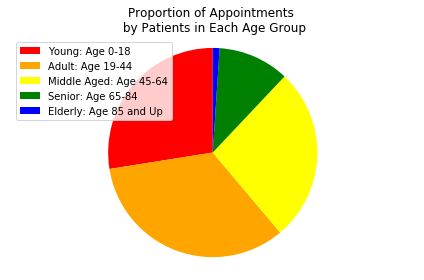

In [136]:
# Pie chart of proportion in each 'age_group'
labels = ['Young: Age 0-18', 'Adult: Age 19-44', 'Middle Aged: Age 45-64', 'Senior: Age 65-84', 'Elderly: Age 85 and Up']
sizes = [p_young, p_adult, p_middle_aged, p_senior, p_elderly]
colors = ['red', 'orange', 'yellow', 'green', 'blue']
patches, texts = plt.pie(sizes, colors=colors, startangle=90)
plt.legend(patches, labels, loc="best")
plt.title('Proportion of Appointments \n by Patients in Each Age Group')
# Set aspect ratio to be equal so that pie is drawn as a circle.
plt.axis('equal')
plt.tight_layout()
plt.show()

The pie chart above shows the proportion of appointments made by patients in each age group. Three age groups make up a comparatively large amount of all appointments: "Young", "Adult", and "Middle Aged." The age groups "Senior" and "Elderly" account for a small percentage, only 12%, of all appointments.

In [137]:
# Drop age column
df = df.drop(['age'], axis = 1)
df.head()

,appointment_id,neighborhood,scholarship,no_show,existing_condition,age_group
0,5642903,jardim da penha,0,1,1,middle_aged
1,5642503,jardim da penha,0,1,0,middle_aged
2,5642549,mata da praia,0,1,0,middle_aged
3,5642828,pontal de camburi,0,1,0,young
4,5642494,jardim da penha,0,1,1,middle_aged


Data cleaning is now complete. To clarify, neighborhood reflects the neighborhood in which a hospital is located, not necessarily the hospital's name. Efforts have been made to clarify this distinction throughout this investigation.

<a id='eda'></a>
## Exploratory Data Analysis

The purpose of the analysis is to understand what patient characterstics are commonly associated with a "no-show" appointment, which is when an appointment is scheduled and the patient does not arrive for the appointment. Once these characteristics have been explored, the neighborhoods, i.e. hospitals, most frequntend by these patients will be analyzed. 

### What group of patients are most commonly "No-Shows," i.e. miss the most appointments?
The dependent variable considered is column 'no_show' (1 if a patient is not a 'no_show', i.e. the patient arrives for the appointment, and 0 if a patients is a 'no_show', i.e. the patient does not arrive for the appointment). The independent variables to be considered are column 'age-group' ('young', 'adult', 'middle_aged', 'senior', and 'elderly'), 'scholarship' (1 if a patient receives 'scholarship' and 0 if a patient does not receive 'schlarship'), and 'existing_condition' (1 if a patient has any of 'hypertension','diabetes','alcoholism', 'handicap' and 0 if a patient does not have any of those "Existing Conditions"). The intent of the analysis is to understand what group of patients is most commonly associated with a 'no-show' appointment.

In [138]:
# Number of appointments that are 'no_show', i.e. 0 in column 'no_show'
df[df['no_show'] == 0].count()[0]

22319

In [139]:
# Proportion of appointments that are 'no_show', i.e. 0 in column 'no_show'
p_all_no_show = 1 - df['no_show'].mean()
print(p_all_no_show)

0.20193438647919948


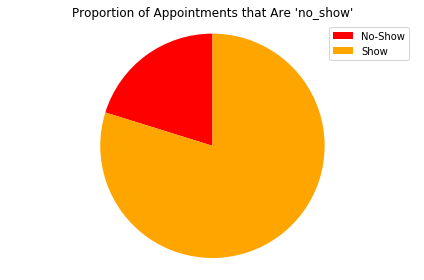

In [140]:
# Pie chart of proportion of appointments that are 'no_show', i.e. 0 in column 'no_show'
labels = ['No-Show', 'Show']
sizes = [p_all_no_show, (1-p_all_no_show)]
colors = ['red', 'orange']
patches, texts = plt.pie(sizes, colors=colors, startangle=90)
plt.legend(patches, labels, loc="best")
plt.title("Proportion of Appointments that Are 'no_show'")
# Set aspect ratio to be equal so that pie is drawn as a circle.
plt.axis('equal')
plt.tight_layout()
plt.show()

22,319 appointments were missed, representing 21% of appointments. This value is encouraging as the vast majority of appointments are kept.

In [141]:
# Create a new dataframe named 'df_no_show' containing only data on 'no-show' appointments
df_no_show = df[df['no_show'] == 0]
# Verify column 'no_show' in 'df_no_show' includes only 0
df_no_show['no_show'].unique()

array([0])

With the creation of the new dataframe 'df_no_show', characteristics of a "no-show" patient can be analyzed.

First, what age-group has the laregest number of "no-show" patients?

In [142]:
# Count "no-shows" by 'age_group'
c_young_no_show = df_no_show[df_no_show['age_group'] == 'young'].count()[0]
c_adult_no_show = df_no_show[df_no_show['age_group'] == 'adult'].count()[0]
c_middle_aged_no_show = df_no_show[df_no_show['age_group'] == 'middle_aged'].count()[0]
c_senior_no_show = df_no_show[df_no_show['age_group'] == 'senior'].count()[0]
c_elderly_no_show = df_no_show[df_no_show['age_group'] == 'elderly'].count()[0]
print(c_young_no_show, c_adult_no_show, c_middle_aged_no_show, c_senior_no_show, c_elderly_no_show)

6741 8441 5071 1871 195


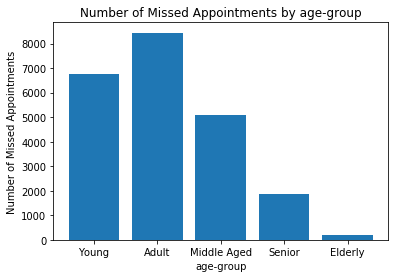

In [143]:
# Bar chart of results from count of "no-shows" by 'age_group'
c_a_locations = [1, 2, 3, 4, 5]
c_a_heights = [c_young_no_show, c_adult_no_show, c_middle_aged_no_show, c_senior_no_show, c_elderly_no_show]
c_a_labels = ['Young', 'Adult', 'Middle Aged', 'Senior', 'Elderly']
plt.bar(c_a_locations, c_a_heights, tick_label=c_a_labels)
plt.title('Number of Missed Appointments by age-group')
plt.xlabel('age-group')
plt.ylabel('Number of Missed Appointments');

In [144]:
# Range of count of "no-shows"
max(c_young_no_show, c_adult_no_show, c_middle_aged_no_show, c_senior_no_show, c_elderly_no_show) - min(c_young_no_show, c_adult_no_show, c_middle_aged_no_show, c_senior_no_show, c_elderly_no_show)

8246

According to these preliminary results, the "Young" and "Adult" age-groups missed the most appointments. After the "Adult" age-group, as age-groups increase in age the number of missed appointments decreases. The range of values is 8,246 appointments, with Adults missing the most and Elderly missing the fewest.

In order to understand if the number of missed appointments relates to the number of appointments overall, the number of missed appointments by age-group will be compared to the total number of appointments by age-group.

In [145]:
# Proportion of 'no-shows' by 'age_group' when compared to the total number of appointments by the age-group
p_young_no_show = df_no_show[df_no_show['age_group'] == 'young'].count()[0]/(df[df['age_group'] == 'young'].count()[0])
p_adult_no_show = df_no_show[df_no_show['age_group'] == 'adult'].count()[0]/(df[df['age_group'] == 'adult'].count()[0])
p_middle_aged_no_show = df_no_show[df_no_show['age_group'] == 'middle_aged'].count()[0]/(df[df['age_group'] == 'middle_aged'].count()[0])
p_senior_no_show = df_no_show[df_no_show['age_group'] == 'senior'].count()[0]/(df[df['age_group'] == 'senior'].count()[0])
p_elderly_no_show = df_no_show[df_no_show['age_group'] == 'elderly'].count()[0]/(df[df['age_group'] == 'elderly'].count()[0])
print(p_young_no_show, p_adult_no_show, p_middle_aged_no_show, p_senior_no_show, p_elderly_no_show)

0.221663213969 0.227067305106 0.171086369771 0.154105922082 0.168103448276


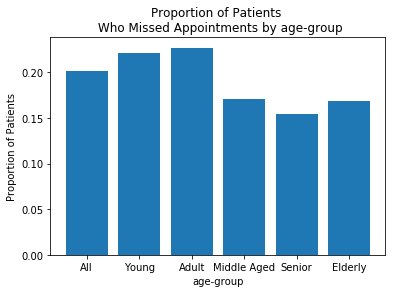

In [146]:
# Bar chart of results from proportion of "no-shows" by 'age_group' when compared to the total number of 
# appointments by the age-group
p_a_locations = [1, 2, 3, 4, 5,6]
p_a_heights = [p_all_no_show, p_young_no_show, p_adult_no_show, p_middle_aged_no_show, p_senior_no_show, p_elderly_no_show]
p_a_labels = ['All','Young', 'Adult', 'Middle Aged', 'Senior', 'Elderly']
plt.bar(p_a_locations, p_a_heights, tick_label=p_a_labels)
plt.title('Proportion of Patients \n Who Missed Appointments by age-group')
plt.xlabel('age-group')
plt.ylabel('Proportion of Patients');

In [147]:
# Create array of the difference between proportion of "no-shows" by 'age_group' when compared to the total number of 
# appointments by the age-group and proportion of all appointments that are 'no_show', i.e. 0 in column 'no_show'
p_a_heights_difference = np.array(p_a_heights) - p_all_no_show

In [148]:
# Create df to display 'p_a_heights_difference'
df_p_a_heights = pd.DataFrame(data = p_a_heights_difference, index = p_a_labels, columns = ['p_diff_age_group'])
df_p_a_heights

,p_diff_age_group
All,0.000000
Young,0.019729
Adult,0.025133
Middle Aged,-0.030848
Senior,-0.047828
Elderly,-0.033831


In [149]:
# Range of proportion differences of 'no-shows'
df_p_a_heights['p_diff_age_group'].max() - df_p_a_heights['p_diff_age_group'].min()

0.072961383023518234

The analysis of the number of "no-shows" by age-group when compared to the total number of appointments by the respective age-group agrees with the earlier results in that the "Adult" age-groups misses the most appointments proportionally.

The range for the difference between the mean of all "no-show" appointments and the mean of each age-group is 7.29%. Furthermore, the "Adult" age-group's proportion of "no-show" appointments is 2.5% greater than the average for all appointments. In contrast, the "Senior" age-group had the lowest proportion of "no-show" appointments: 4.78% lower than the average of all appointments.

Preliminary conclusions imply the "Adult" age-group, ages 19-44,  has the most "no-show" appointments.

The next question is which group has more "no-show" appointments, patients who receive "Scholarship" or patients who do not receive "Scholarship"?

In [150]:
# Count "no-shows" by 'scholarship'
c_s_no_show = df_no_show[df_no_show['scholarship'] == 1].count()[0]
c_no_s_no_show = df_no_show[df_no_show['scholarship'] == 0].count()[0]
print(c_s_no_show, c_no_s_no_show)

2578 19741


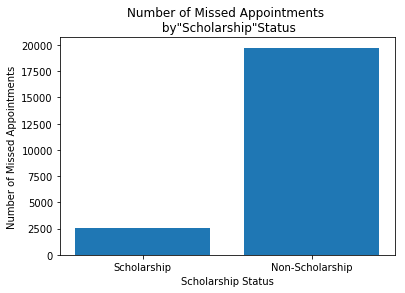

In [151]:
# Bar chart of results from count of "no-shows" by 'scholarship'
c_s_locations = [1, 2]
c_s_heights = [c_s_no_show, c_no_s_no_show]
c_s_labels = ['Scholarship', 'Non-Scholarship']
plt.bar(c_s_locations, c_s_heights, tick_label=c_s_labels)
plt.title('Number of Missed Appointments \n by"Scholarship"Status')
plt.xlabel('Scholarship Status')
plt.ylabel('Number of Missed Appointments');

According to these preliminary results, the "Non-Scholarship" group missed the most appointments.

In order to understand if the number of missed appointments relates to the number of appointments overall, the number of missed appointments by"Scholarship"status will be compared to the total number of appointments by"Scholarship"status.

In [152]:
# Proportion of 'no-shows' by 'scholarship' when compared to the total number of appointments by the 'scholarship'
# sub-group
p_s_no_show = df_no_show[df_no_show['scholarship'] == 1].count()[0]/(df[df['scholarship'] == 1].count()[0])
p_no_s_no_show = df_no_show[df_no_show['scholarship'] == 0].count()[0]/(df[df['scholarship'] == 0].count()[0])
print(p_s_no_show, p_no_s_no_show)

0.237363042077 0.19807354638


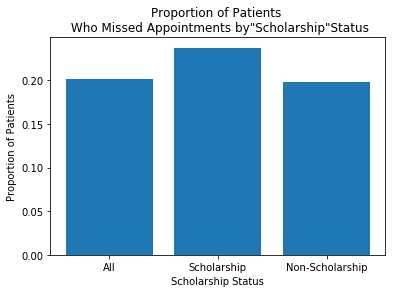

In [153]:
# Bar chart of results from proportion of "no-shows" by 'scholarship' when compared to the total number of 
# appointments by"Scholarship"status
p_s_locations = [1, 2,3]
p_s_heights = [p_all_no_show, p_s_no_show, p_no_s_no_show]
p_s_labels = ['All','Scholarship', 'Non-Scholarship']
plt.bar(p_s_locations, p_s_heights, tick_label=p_s_labels)
plt.title('Proportion of Patients \n Who Missed Appointments by"Scholarship"Status')
plt.xlabel('Scholarship Status')
plt.ylabel('Proportion of Patients');

In [154]:
# Create array of the difference between proportion of 'no-shows' by 'scholarhsip' when compared to the total number of 
# appointments by the"Scholarship"and proportion of all appointments that are 'no_show', i.e. 0 in column 'no_show'
p_s_heights_difference = np.array(p_s_heights) - p_all_no_show

In [155]:
# Create df to display 'p_s_heights_difference'
df_p_s_heights = pd.DataFrame(data = p_s_heights_difference, index = p_s_labels, columns = ['p_diff_scholarship'])
df_p_s_heights

,p_diff_scholarship
All,0.000000
Scholarship,0.035429
Non-Scholarship,-0.003861


In [156]:
# Range of proportion differences of "no-shows"
df_p_s_heights['p_diff_scholarship'].max() - df_p_s_heights['p_diff_scholarship'].min()

0.039289495696782556

The analysis of the number of "no-shows" by "Scholarship" status when compared to the total number of appointments by the respective "Scholarship" status contrasts with the earlier results in that the "Scholarship" group misses the most appointments proportionally.

The range for the difference between the mean of all "no-show" appointments and the mean of each "Scholarship" group is 3.93%. Furthermore, the "Scholarship" group's proportion of "no-show" appointments is 3.54% greater than the average for all appointments. In contrast, the 'Non-scholarship' group's proportion of "no-show" appointments is 0.38% lower than the average of all appointments.

Preliminary conclusions imply the 'Scholarship' group proportionally has more "no-show" appointments.

The next question is which group has more "no-show" appointments, patients with "Existing Conditions" or patients without "Existing Conditions"?

In [157]:
# Count 'no-shows' by 'existing_condition'
c_e_no_show = df_no_show[df_no_show['existing_condition'] == 1].count()[0]
c_no_e_no_show = df_no_show[df_no_show['existing_condition'] == 0].count()[0]
print(c_e_no_show, c_no_e_no_show)

4716 17603


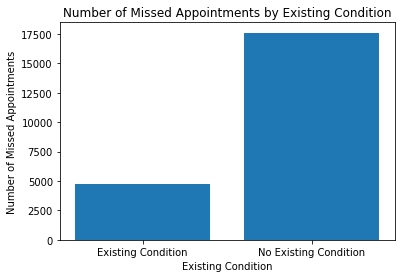

In [158]:
# Bar chart of results from count of 'no-shows' by 'existing_condition'
c_e_locations = [1, 2]
c_e_heights = [c_e_no_show, c_no_e_no_show]
c_e_labels = ['Existing Condition', 'No Existing Condition']
plt.bar(c_e_locations, c_e_heights, tick_label=c_e_labels)
plt.title('Number of Missed Appointments by Existing Condition')
plt.xlabel('Existing Condition')
plt.ylabel('Number of Missed Appointments');

According to these preliminary results, the "No Existing Condition" group missed the most appointments.

In order to understand if the number of missed appointments relates to the number of appointments overall, the number of missed appointments by "Existing Condition" will be compared to the total number of appointments by "Existing Condition".

In [159]:
# Proportion of 'no-shows' by 'existing_condition' when compared to the total number of appointments 
# by patients with an 'existing_condition'
p_e_no_show = df_no_show[df_no_show['existing_condition'] == 1].count()[0]/(df[df['existing_condition'] == 1].count()[0])
p_no_e_no_show = df_no_show[df_no_show['existing_condition'] == 0].count()[0]/(df[df['existing_condition'] == 0].count()[0])
print(p_e_no_show, p_no_e_no_show)

0.178555202181 0.20927550705


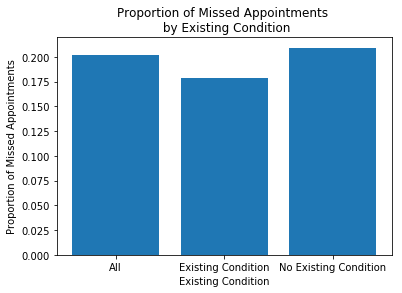

In [160]:
# Bar chart of results from proportion of 'no-shows' by 'existing_condition' when compared to the total number of 
# appointments by patients with an 'existing_condition'
p_e_locations = [1, 2,3]
p_e_heights = [p_all_no_show, p_e_no_show, p_no_e_no_show]
p_e_labels = ['All','Existing Condition', 'No Existing Condition']
plt.bar(p_e_locations, p_e_heights, tick_label=p_e_labels)
plt.title('Proportion of Missed Appointments \n by Existing Condition')
plt.xlabel('Existing Condition')
plt.ylabel('Proportion of Missed Appointments');

In [161]:
# Create array of the difference between proportion of "no-shows" by 'existing_condition' when compared to the 
# total number of appointments by patients in each 'existing_condition' group and proportion of all appointments
# that are 'no_show', i.e. 0 in column 'no_show'
p_e_heights_difference = np.array(p_e_heights) - p_all_no_show

In [162]:
# Create df to display 'p_e_heights_difference'
df_p_e_heights = pd.DataFrame(data = p_e_heights_difference, index = p_e_labels, columns = ['p_diff_existing_condition'])
df_p_e_heights

,p_diff_existing_condition
All,0.000000
Existing Condition,-0.023379
No Existing Condition,0.007341


In [163]:
# Range of proportion differences of "no-shows"
df_p_e_heights['p_diff_existing_condition'].max() - df_p_e_heights['p_diff_existing_condition'].min()

0.030720304869129106

The analysis of the number of "no-shows" by patients' "Existing Condition" group when compared to the total number of appointments by the respective patients agrees with the earlier results in that the patients with an exisiting condition miss the most appointments proportionally.

The range for the difference between the mean of all "no-show" appointments and the mean of each group of patients is 3.07%. Furthermore, the "No Existing Condition" group's proportion of "no-show" appointments is 0.07% greater than the average for all appointments. In contrast, the "Existing Condition" group's proportion of "no-show" appointments is 2.34% lower than the average of all appointments.

Preliminary conclusions imply the "No Existing Condition" group proportionally has more "no-show" appointments.

This analysis will be used for the next section to see which hospital receives the most of each group with the highest proportion of "no-show" appointments: Adults, Scholarship, and No Exisiting Condition.

### Which hospital sees the largest proportion of the group of patients who are most commonly "No-Shows," i.e. miss the most appointments?
With the initial analysis is complete, the above indpendent variables will be grouped by neighborhood, the next dependent variable to be analyzed. Grouping by neighborhood will create profiles for each neighborhood based on how many patients visit each neigborhood who are in the "Adult" age-group, are in the "Scholarship" group, and are in the "No Existing Condition" group.

First, the neighborhood which receives the most appointments from patients in each group will be found. This data will be compared to the proportion of the neighborhoods' total number of appointments.

Then the neighborhood which receives the most patients from all three groups combined will be found. Again, this data will be compared to the proportion of the neighborhoods' total number of appointments.

In [164]:
# Create dataframe of all data grouped by 'neighborhood'
df_neighborhood = df.groupby(['neighborhood']).count()

In [165]:
# Drop all columns except 'appointment_id' as count for total number of appointments per 'neighborhood'
df_neighborhood = df_neighborhood.drop(['scholarship', 'no_show', 'existing_condition', 'age_group'], axis=1)

In [166]:
# Rename 'appointment_id' column to 'count_all_appointments'
df_neighborhood = df_neighborhood.rename(index=str, columns={'appointment_id': 'count_all_appointments'})

In [167]:
# Calculate the mean of 'count_all_appointments' in each 'neighborhood'
neighborhood_m = df_neighborhood['count_all_appointments'].mean()

In [168]:
# Drop all rows in 'neighborhood' with a value in 'count_all_appointments' less than the mean
df_neighborhood = df_neighborhood[df_neighborhood.count_all_appointments > neighborhood_m]

In [169]:
df_neighborhood.head()

,count_all_appointments
neighborhood,
andorinhas,2262
bela vista,1907
bonfim,2773
caratoíra,2565
centro,3334


In order to focus the analysis on the largest neighborhoods, all nieghborhoods with fewer appointments than the mean are removed from the dataframe. Going forward, all caclulations will be based on this new dataframe which only includes neighborhoods with more appointments than the mean number of appointments in each neighborhood.

The first independent variable to be analyzed is the "Adult" age-group.

In [170]:
# Create dataframe with only 'adult' appointments in the 'age_group' column
df_adult = df[df['age_group'] == 'adult']

In [171]:
# Drop all columns except 'neighborhood' and 'age_group'
df_adult = df_adult.drop(['appointment_id', 'scholarship', 'no_show', 'existing_condition'], axis=1)

In [172]:
# Count of number of appointments by patients with 'adult' age-group for each neighborhood
df_adult = df_adult.groupby(['neighborhood']).count().sort_values(by = 'age_group', ascending = False)

In [173]:
# Rename 'age_group' column to 'count_adult_appointments'
df_adult = df_adult.rename(index=str, columns={'age_group': 'count_adult_appointments'})

In [174]:
# Add column 'count_all_appointments' to df_adult and drop all 'NaN' columns
df_adult = df_adult.join(df_neighborhood).dropna(axis = 0)

In [175]:
# Rename df_adult to create dfc_adult for the count of 'adult'
dfc_adult = df_adult

In [176]:
dfc_adult.head(10)

,count_adult_appointments,count_all_appointments
neighborhood,,
jardim camburi,2075,7717.0
maria ortiz,1924,5805.0
resistência,1711,4431.0
itararé,1265,3514.0
jardim da penha,1250,3877.0
santa martha,1127,3131.0
centro,1121,3334.0
bonfim,1071,2773.0
tabuazeiro,1044,3132.0


In [177]:
dfc_adult_m = [dfc_adult['count_adult_appointments'].mean()]

In [178]:
print(dfc_adult_m)

[905.5]


In [179]:
c_adult_heights = dfc_adult['count_adult_appointments'].head(10).tolist()

In [180]:
c_adult_heights = c_adult_heights + dfc_adult_m

In [181]:
c_adult_labels = dfc_adult.index.format()[0:10]

In [182]:
c_adult_labels = c_adult_labels + ['All']

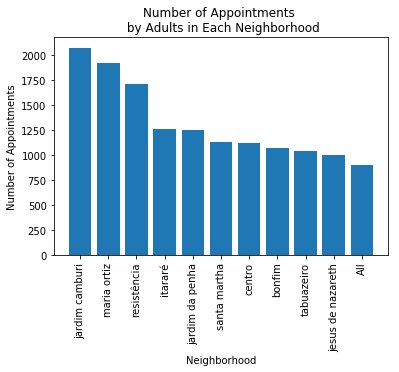

In [183]:
# Bar chart of results from count of "Adults" who made appointments in each 'neighborhood'
c_aa_locations = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
c_aa_heights = c_adult_heights
c_aa_labels = c_adult_labels
plt.bar(c_aa_locations, c_aa_heights)
plt.title('Number of Appointments \n by Adults in Each Neighborhood')
plt.xlabel('Neighborhood')
plt.xticks(c_aa_locations, c_aa_labels, rotation=90)
plt.ylabel('Number of Appointments');

Above is the bar chart of the 10 neighborhoods who receive the highest number of "Adults" who make appointments at each "Neighborhood." Each neighborhood receives 1,000 or more appointments for "Adult" patients.

Now, the proportion of appointments for "Adult" patients will be analyzed. The proportion of "Adult" appointments at each "Neighborhood" will be compared to the overall proportion of appointments for "Adult" patients in all "Neighborhoods."

In [184]:
# Divide 'count_adult_appointments' by 'count_all_appointments'
df_adult['proportion_adult_appointments'] = df_adult['count_adult_appointments'] / df_adult['count_all_appointments']

In [185]:
# Rename df_adult to create dfp_adult for the proportion of 'adult'
dfp_adult = df_adult

In [186]:
# Sort values by column 'propoortion_adult_appointments'
dfp_adult = dfp_adult.sort_values(by = 'proportion_adult_appointments', ascending = False);

In [187]:
dfp_adult.head(10)

,count_adult_appointments,count_all_appointments,proportion_adult_appointments
neighborhood,,,
redenção,653,1553.0,0.420476
forte são joão,756,1889.0,0.400212
cruzamento,550,1398.0,0.393419
bonfim,1071,2773.0,0.386224
resistência,1711,4431.0,0.386143
andorinhas,868,2262.0,0.383731
da penha,833,2217.0,0.375733
gurigica,757,2018.0,0.375124
romão,827,2214.0,0.373532


In [188]:
dfp_adult_m = [dfp_adult['proportion_adult_appointments'].mean()]

In [189]:
print(dfp_adult_m)

[0.3458778710357711]


In [190]:
p_adult_heights = dfp_adult['proportion_adult_appointments'].head(10).tolist()

In [191]:
p_adult_heights = p_adult_heights + dfp_adult_m

In [192]:
p_adult_labels = dfp_adult.index.format()[0:10]

In [193]:
p_adult_labels = p_adult_labels + ['All']

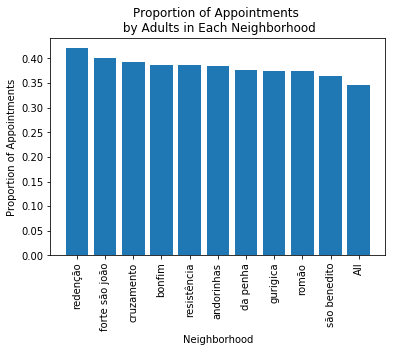

In [194]:
# Bar chart of results the proportion of "Adults" who made appointments in each 'neighborhood'
p_aa_locations = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
p_aa_heights = p_adult_heights
p_aa_labels = p_adult_labels
plt.bar(p_aa_locations, p_aa_heights)
plt.title('Proportion of Appointments \n by Adults in Each Neighborhood')
plt.xlabel('Neighborhood')
plt.xticks(p_aa_locations, p_aa_labels, rotation=90)
plt.ylabel('Proportion of Appointments');

Preliminary analysis suggests resources to understand and limit "no-show" appointments may be well utilized at the neighborhood Resistência. Resistência ranks 3rd in the number of adult patient appointments with 1,711 compared to an average of 906 and 5th in the proportion of adult patients with 38.6% compared to an average of 34.6%.

Next, the neighborhood which receives the most appointments from patients in the "Scholarship" group will be found. This data will be compared to the proportion of the neighborhoods' total number of appointments.

In [195]:
# Create dataframe with only patients who receive scholarship in the 'scholarship' column
df_scholarship = df[df['scholarship'] == 1]

In [196]:
# Drop all columns except 'neighborhood' and 'scholarship'
df_scholarship = df_scholarship.drop(['appointment_id', 'no_show', 'existing_condition', 'age_group'], axis=1)

In [197]:
# Count of number of appointments by patients who receive 'scholarship' in each 'neighborhood'
df_scholarship = df_scholarship.groupby(['neighborhood']).count().sort_values(by = 'scholarship', ascending = False)

In [198]:
# Rename 'scholarship' column to 'count_scholarship_appointments'
df_scholarship = df_scholarship.rename(index=str, columns={'scholarship': 'count_scholarship_appointments'})

In [199]:
# Add column 'count_all_appointments' to df_scholarship and drop all 'NaN' columns
df_scholarship = df_scholarship.join(df_neighborhood).dropna(axis = 0)

In [200]:
# Rename df_scholarship to create dfc_scholarship for the count of 'scholarship'
dfc_scholarship = df_scholarship

In [201]:
dfc_scholarship.head(10)

,count_scholarship_appointments,count_all_appointments
neighborhood,,
ilha do príncipe,579,2266.0
tabuazeiro,537,3132.0
resistência,468,4431.0
caratoíra,456,2565.0
santa martha,441,3131.0
gurigica,422,2018.0
são benedito,404,1439.0
bonfim,373,2773.0
santo andré,334,2571.0


In [202]:
dfc_scholarship_m = [dfc_scholarship['count_scholarship_appointments'].mean()]

In [203]:
print(dfc_scholarship_m)

[265.03125]


In [204]:
c_scholarship_heights = dfc_scholarship['count_scholarship_appointments'].head(10).tolist()

In [205]:
c_scholarship_heights = c_scholarship_heights + dfc_scholarship_m

In [206]:
c_scholarship_labels = dfc_scholarship.index.format()[0:10]

In [207]:
c_scholarship_labels = c_scholarship_labels + ['All']

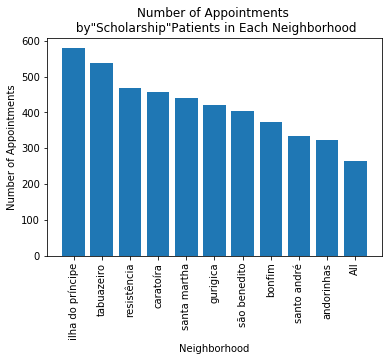

In [208]:
# Bar chart of results from count of 'scholarship' patients who made appointments in each 'neighborhood'
c_sa_locations = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
c_sa_heights = c_scholarship_heights
c_sa_labels = c_scholarship_labels
plt.bar(c_sa_locations, c_sa_heights)
plt.title('Number of Appointments \n by"Scholarship"Patients in Each Neighborhood')
plt.xlabel('Neighborhood')
plt.xticks(c_sa_locations, c_sa_labels, rotation=90)
plt.ylabel('Number of Appointments');

Above is the chart of the 10 neighborhoods who receive the highest number of "Scholarship" patients who make appointments in each "Neighborhood." Each neighborhood receives 300 or more appointments for "Scholarship" patients compared to the mean of 265 appointments by "Scholarship" patients across all neighborhoods.

Now, the proportion of appointments for "Scholarship" patients will be analyzed. The proportion of "Scholarship" appointments in each "Neighborhood" will be compared to the overall proportion of appointments for "Scholarship" patients in all "Neighborhoods."

In [209]:
# Divide 'count_scholarship_appointments' by 'count_all_appointments'
df_scholarship['proportion_scholarship_appointments'] = df_scholarship['count_scholarship_appointments'] / df_scholarship['count_all_appointments']

In [210]:
# Rename df_scholarship to create dfp_scholarship for the proportion of 'scholarship'
dfp_scholarship = df_scholarship

In [211]:
# Sort values by column 'propoortion_scholarship_appointments'
dfp_scholarship = dfp_scholarship.sort_values(by = 'proportion_scholarship_appointments', ascending = False);

In [212]:
dfp_scholarship.head(10)

,count_scholarship_appointments,count_all_appointments,proportion_scholarship_appointments
neighborhood,,,
são benedito,404,1439.0,0.280751
ilha do príncipe,579,2266.0,0.255516
gurigica,422,2018.0,0.209118
caratoíra,456,2565.0,0.177778
tabuazeiro,537,3132.0,0.171456
joana d´arc,219,1427.0,0.153469
consolação,199,1376.0,0.144622
andorinhas,323,2262.0,0.142794
santa martha,441,3131.0,0.140850


In [213]:
dfp_scholarship_m = [dfp_scholarship['proportion_scholarship_appointments'].mean()]

In [214]:
print(dfp_scholarship_m)

[0.1136161142962836]


In [215]:
p_scholarship_heights = dfp_scholarship['proportion_scholarship_appointments'].head(10).tolist()

In [216]:
p_scholarship_heights = p_scholarship_heights + dfp_scholarship_m

In [217]:
p_scholarship_labels = dfp_scholarship.index.format()[0:10]

In [218]:
p_scholarship_labels = p_scholarship_labels + ['All']

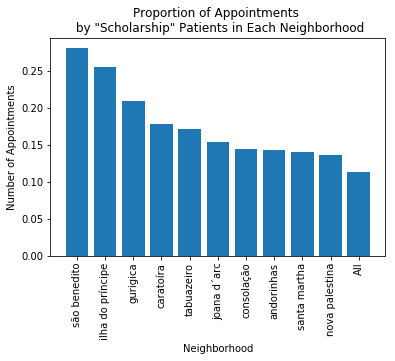

In [219]:
# Bar chart of results from proportion of 'scholarship' patients who made appointments in each 'neighborhood'
p_sa_locations = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
p_sa_heights = p_scholarship_heights
p_sa_labels = p_scholarship_labels
plt.bar(p_sa_locations, p_sa_heights)
plt.title('Proportion of Appointments \n by "Scholarship" Patients in Each Neighborhood')
plt.xlabel('Neighborhood')
plt.xticks(p_sa_locations, p_sa_labels, rotation=90)
plt.ylabel('Number of Appointments');

Preliminary analysis suggests resources to understand and limit "no-show" appointments may be well utilized at the neighborhood Ilha do Príncipe. Ilha do Príncipe ranks 1st in the number of "Scholarship" patient appointments with 579 compared to an average of 265 and 2nd in the proportion of adult patients with 25.6% compared to an average of 11.4%.

Next, the neighborhood which receives the most appointments from patients in the "No Existing Condition" group will be found. This data will be compared to the proportion of the neighborhoods' total number of appointments.

In [220]:
# Create dataframe with only patients without existing conditions in the 'existing_condition' column
df_excon = df[df['existing_condition'] == 0]

In [221]:
# Drop all columns except 'neighborhood' and 'existing_condition'
df_excon = df_excon.drop(['appointment_id', 'no_show', 'scholarship', 'age_group'], axis=1)

In [222]:
# Count of number of appointments by patients who have no 'existing_condition' in each 'neighborhood'
df_excon = df_excon.groupby(['neighborhood']).count().sort_values(by = 'existing_condition', ascending = False)

In [223]:
# Rename 'existing_condition' column to 'count_no_existing_condition_appointments'
df_excon = df_excon.rename(index=str, columns={'existing_condition': 'count_no_existing_condition_appointments'})

In [224]:
# Add column 'count_all_appointments' to df_excon and drop all 'NaN' columns
df_excon = df_excon.join(df_neighborhood).dropna(axis = 0)

In [225]:
# Rename df_excon to create dfc_excon for the count of 'existing_condition'
dfc_excon = df_excon

In [226]:
dfc_excon.head(10)

,count_no_existing_condition_appointments,count_all_appointments
neighborhood,,
jardim camburi,7143,7717.0
maria ortiz,5656,5805.0
resistência,3407,4431.0
jardim da penha,2774,3877.0
itararé,2606,3514.0
centro,2481,3334.0
jabour,2405,2509.0
tabuazeiro,2311,3132.0
jesus de nazareth,2230,2853.0


In [227]:
dfc_excon_m = [dfc_excon['count_no_existing_condition_appointments'].mean()]

In [228]:
print(dfc_excon_m)

[2040.4375]


In [229]:
c_excon_heights = dfc_excon['count_no_existing_condition_appointments'].head(10).tolist()

In [230]:
c_excon_heights = c_excon_heights + dfc_excon_m

In [231]:
c_excon_labels = dfc_excon.index.format()[0:10]

In [232]:
c_excon_labels = c_excon_labels + ['All']

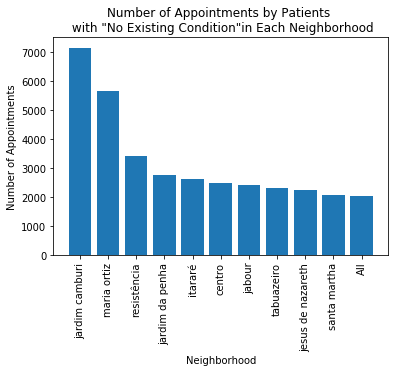

In [233]:
# Bar chart of results from count of patients with no 'existing_condition' who made appointments in each 'neighborhood'
c_ea_locations = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
c_ea_heights = c_excon_heights
c_ea_labels = c_excon_labels
plt.bar(c_ea_locations, c_ea_heights)
plt.title('Number of Appointments by Patients \n with "No Existing Condition"in Each Neighborhood')
plt.xlabel('Neighborhood')
plt.xticks(c_ea_locations, c_ea_labels, rotation=90)
plt.ylabel('Number of Appointments');

Above is the chart of the 10 neighborhoods who receive the highest number of patients with "No Existing Conditions" who make appointments in each neighborhood. Each neighborhood receives 2,069 or more appointments for patients with "No Existing Conditions" compared to the mean of 2,040 appointments by patients with "No Existing Conditions" across all neighborhoods. The neighborhood Jardim Camburi seems to be an outlier with 7,143 appointments made by patients with "No Existing Conditions"; further analysis should be done to consider why this neighborhood sees so many patient with "No Existing Conditions" or if this data is inaccurate.

Now, the proportion of appointments for patients with "No Existing Conditions" will be analyzed. The proportion of "No Existing Condition" appointments in each neighborhood will be compared to the overall proportion of appointments for "Existing Condition" patients in all neighborhoods.

In [234]:
# Divide 'count_no_existing_condition_appointments' by 'count_all_appointments'
df_excon['proportion_no_existing_condition_appointments'] = df_excon['count_no_existing_condition_appointments'] / df_excon['count_all_appointments']

In [235]:
# Rename df_excon to create dfp_excon for the proportion of 'existing_condition'
dfp_excon = df_excon

In [236]:
# Sort values by column 'propoortion_existing_condition_appointments'
dfp_excon = dfp_excon.sort_values(by = 'proportion_no_existing_condition_appointments', ascending = False);

In [237]:
dfp_excon.head(10)

,count_no_existing_condition_appointments,count_all_appointments,proportion_no_existing_condition_appointments
neighborhood,,,
maria ortiz,5656,5805.0,0.974332
ilha de santa maria,1827,1885.0,0.969231
jabour,2405,2509.0,0.958549
jardim camburi,7143,7717.0,0.925619
jesus de nazareth,2230,2853.0,0.781633
ilha do príncipe,1745,2266.0,0.770079
resistência,3407,4431.0,0.768901
forte são joão,1441,1889.0,0.762837
centro,2481,3334.0,0.744151


In [238]:
dfp_excon_m = [dfp_excon['proportion_no_existing_condition_appointments'].mean()]

In [239]:
print(dfp_excon_m)

[0.7441066150132695]


In [240]:
p_excon_heights = dfp_excon['proportion_no_existing_condition_appointments'].head(10).tolist()

In [241]:
p_excon_heights = p_excon_heights + dfp_excon_m

In [242]:
p_excon_labels = dfp_excon.index.format()[0:10]

In [243]:
p_excon_labels = p_excon_labels + ['All']

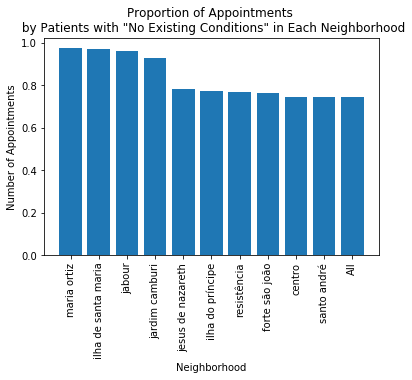

In [244]:
# Bar chart of results from count of all patients with no 'existing_condition' who made appointments in each 'neighborhood'
p_ea_locations = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
p_ea_heights = p_excon_heights
p_ea_labels = p_excon_labels
plt.bar(p_ea_locations, p_ea_heights)
plt.title('Proportion of Appointments \n by Patients with "No Existing Conditions" in Each Neighborhood')
plt.xlabel('Neighborhood')
plt.xticks(p_ea_locations, p_ea_labels, rotation=90)
plt.ylabel('Number of Appointments');

Preliminary analysis suggests resources to understand and limit "no-show" appointments may be well utilized at the neighborhood Maria Ortiz. Maria Ortiz ranks 2nd in the number of appointments by patients with "No Existing Conditions" with 5656 compared to an average of 2040 and 1st in the proportion of patients with "No Existing Conditions" with 97.4% compared to an average of 74.4%.

Finally, each "Neighborhood" will be analyzed based on the number of patients seen from all three categories: "Adult," "Scholarship," and "No Existing Condition."

In [245]:
# Create dataframe with only 'adult', 'scholarship', and 'existing_condition' appointments
df['asec'] = np.where(((df['age_group']=='adult') | (df['scholarship']==1) | (df['existing_condition']==0)), 1, 0)

In [246]:
# Drop all columns except 'neighborhood' and 'asec'
df_asec = df.drop(['appointment_id', 'scholarship', 'no_show', 'existing_condition','age_group'], axis=1)

In [247]:
# Drop all rows without a 1 in column 'asec'
df_asec = df_asec[df_asec.asec == 1]

In [248]:
# Count of number of appointments by patients in group 'asec' in each 'neighborhood'
df_asec = df_asec.groupby(['neighborhood']).count().sort_values(by = 'asec', ascending = False)

In [249]:
# Rename 'asec' column to 'count_asec_appointments'
df_asec = df_asec.rename(index=str, columns={'asec': 'count_asec_appointments'})

In [250]:
# Add column 'count_all_appointments' to df_asec and drop all 'NaN' columns
df_asec = df_asec.join(df_neighborhood).dropna(axis = 0)

In [251]:
# Rename df_asec to create dfc_asec for the count of 'adult', 'scholarship', and 'existing_condition'
dfc_asec = df_asec

In [252]:
df_asec.head(10)

,count_asec_appointments,count_all_appointments
neighborhood,,
jardim camburi,7182,7717.0
maria ortiz,5692,5805.0
resistência,3676,4431.0
jardim da penha,2853,3877.0
itararé,2791,3514.0
centro,2612,3334.0
tabuazeiro,2528,3132.0
jabour,2424,2509.0
jesus de nazareth,2411,2853.0


In [253]:
dfc_asec_m = [dfc_asec['count_asec_appointments'].mean()]

In [254]:
print(dfc_asec_m)

[2190.0625]


In [255]:
c_asec_heights = dfc_asec['count_asec_appointments'].head(10).tolist()

In [256]:
c_asec_heights = c_asec_heights + dfc_asec_m

In [257]:
c_asec_labels = dfc_asec.index.format()[0:10]

In [258]:
c_asec_labels = c_asec_labels + ['All']

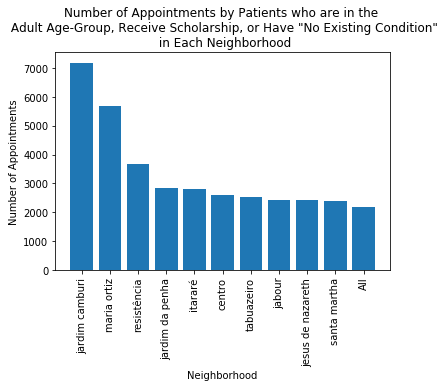

In [259]:
# Bar chart of results from count of patients within 'asec' who made appointments in each 'neighborhood'
c_asec_locations = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
c_asec_heights = c_asec_heights
c_asec_labels = c_asec_labels
plt.bar(c_asec_locations, c_asec_heights)
plt.title('Number of Appointments by Patients who are in the \n Adult Age-Group, Receive Scholarship, or Have "No Existing Condition"\n in Each Neighborhood')
plt.xlabel('Neighborhood')
plt.xticks(c_asec_locations, c_asec_labels, rotation=90)
plt.ylabel('Number of Appointments');

Above is the chart of the 10 neighborhoods who receive the highest number of patients who are "Adults", recive "Scholarship" or have "No Existing Conditions" who make appointments in each "Neighborhood." Each "Neighborhood" receives 2,393 or more appointments for patients in this group compared to the mean of 2,190 appointments by patients with in these groups across all "Neighborhoods".

Now, the proportion of appointments for patients in all these groups will be analyzed. The proportion of appointments by patients in these groups in each "Neighborhood" will be compared to the overall proportion of appointments for these patients in all "Neighborhoods."

In [260]:
# Divide 'count_asec_appointments' by 'count_all_appointments'
df_asec['proportion_asec_appointments'] = df_asec['count_asec_appointments'] / df_asec['count_all_appointments']

In [261]:
# Rename df_asec to create dfc_asec for the proportion of 'adult', 'scholarship', and 'existing_condition'
dfp_asec = df_asec

In [262]:
# Sort values by column 'propoortion_asec_appointments'
dfp_asec = dfp_asec.sort_values(by = 'proportion_asec_appointments', ascending = False);

In [263]:
dfp_asec.head(10)

,count_asec_appointments,count_all_appointments,proportion_asec_appointments
neighborhood,,,
maria ortiz,5692,5805.0,0.980534
ilha de santa maria,1845,1885.0,0.978780
jabour,2424,2509.0,0.966122
jardim camburi,7182,7717.0,0.930673
jesus de nazareth,2411,2853.0,0.845075
forte são joão,1589,1889.0,0.841186
gurigica,1680,2018.0,0.832507
resistência,3676,4431.0,0.829610
são benedito,1191,1439.0,0.827658


In [264]:
dfp_asec_m = [dfp_asec['proportion_asec_appointments'].mean()]

In [265]:
print(dfp_asec_m)

[0.808276283639208]


In [266]:
p_asec_heights = dfp_asec['proportion_asec_appointments'].head(10).tolist()

In [267]:
p_asec_heights = p_asec_heights + dfp_asec_m

In [268]:
p_asec_labels = dfp_asec.index.format()[0:10]

In [269]:
p_asec_labels = p_asec_labels + ['All']

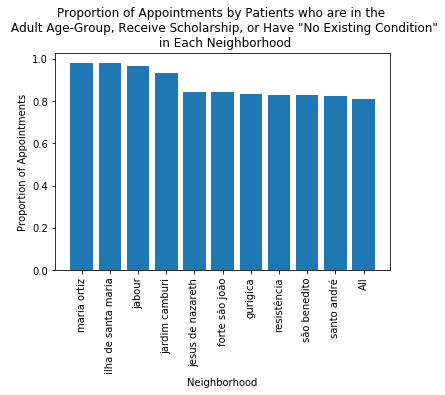

In [270]:
# Bar chart of results from proportion of patients within 'asec' group who made appointments in each 'neighborhood'
p_asec_locations = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
p_asec_heights = p_asec_heights
p_asec_labels = p_asec_labels
plt.bar(p_asec_locations, p_asec_heights)
plt.title('Proportion of Appointments by Patients who are in the \n Adult Age-Group, Receive Scholarship, or Have "No Existing Condition"\n in Each Neighborhood')
plt.xlabel('Neighborhood')
plt.xticks(p_asec_locations, p_asec_labels, rotation=90)
plt.ylabel('Proportion of Appointments');

Preliminary analysis of all three independent variables ("Adult", "Scholarship", "No Existing Condition") combined suggests resources to understand and limit "no-show" appointments may be well utilized at the neighborhood Maria Ortiz. Maria Ortiz ranks 2nd in the number of appointments by patients with any of the three variables with 5,692 compared to an average of 2,190 and 1st in proportion with 98.1% compared to an average of 80.8%. Maria Ortiz is the highest rank neighborhood which appears in the top 10 values of count and proportion of patients.

Finally, all 8 data sets analyzed so far will be concatonated to see which "Neighborhood" appeared most frequently on within the top 10 of all "Neighborhood" count and proportion tables.

In [271]:
# Table of neighborhoods who appeared in the top 10 of more than 1 list
dfc_asec = dfc_asec.head(10)
dfc_excon = dfc_excon.head(10)
dfc_scholarship = dfc_scholarship.head(10)
dfc_adult = dfc_adult.head(10)
dfp_asec = dfp_asec.head(10)
dfp_excon = dfp_excon.head(10)
dfp_scholarship = dfp_scholarship.head(10)
dfp_adult = dfp_adult.head(10)

In [272]:
# Table of neighborhoods who appeared in the top 10 of more than 1 list
df_all = dfc_asec.append([dfc_excon, dfc_scholarship, dfc_adult, dfp_asec, dfp_excon, dfp_scholarship, dfp_adult]).reset_index()

In [273]:
df_all = df_all[['neighborhood']]

In [274]:
df_all = df_all.neighborhood.value_counts().to_frame().reset_index()

In [275]:
df_all = df_all.rename(index=str, columns={'index': 'neighborhood', "neighborhood": "count"});

In [276]:
df_all.head(10)

,neighborhood,count
0,resistência,7
1,tabuazeiro,5
2,jesus de nazareth,5
3,santa martha,5
4,maria ortiz,5
5,jardim camburi,5
6,gurigica,4
7,centro,4
8,jabour,4
9,são benedito,4


According to the table above, the "Neighborhood" Resistência appeared most frequently within the top 10 for all variables considered.

<a id='conclusions'></a>
## Conclusions

The groups which stood out for further investigation are patients who are in the age-group "Adults", patients who receive "Scholarship", and patients who have "No Existing Condition." More elaborate statistical models should be used to confirm whether or not these traits can be associated with a "no-show" appointment.

The neighborhood where these three groups most often schedule appointments was examined. The hospital located in the "Neighborhood" Resistência stood out among others as the strongest candidate for further study and potential experimental intervention in the prevention of "no-shows." Resistência appeared 7 times within the top 10 of neighborhoods who scheduled the most appointments for the groups identified earlier as potentially being associated with "no-show" appointments.

Further investigation must be done to fully understand the data analyzed within this report. Care must be given to critique the data associated with the column 'existing_condition' as this variable heavy weighed the final analysis.

"No-show" appointments misappropriate resources resulting in the mis-use of healthcare funds. In order limit the misuse of medical practicitioners' time and healthcare providers' resources, preliminary analysis of "no-show" data was conducted. While causation cannot be drawn from this analysis, patterns arose which warrant further statistical investigation.

## Resources
- https://www.kaggle.com/joniarroba/noshowappointments
- https://data.worldbank.org/indicator/SH.XPD.PCAP?end=2014&start=1995&view=chart
- https://data.worldbank.org/indicator/NY.GDP.PCAP.CD?view=chart
- https://www.cms.gov/Research-Statistics-Data-and-Systems/Statistics-Trends-and-Reports/NationalHealthExpendData/Age-and-Gender.html
- https://stackoverflow.com/
- http://pandas.pydata.org/
- https://matplotlib.org/
- https://docs.scipy.org/doc/
- https://chrisalbon.com/